# Group Project
## Suicide Rates Overview 1985 to 2016
Compares socio-economic info with suicide rates by year and country.

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### Import needed library & csv file dataset

In [1]:
#Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Import csv file dataset
path = 'suicide.csv'
suicide = pd.DataFrame(pd.read_csv(path))
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


### Data Preparation

In [18]:
#Check the number of rows and columns in the dataframe
suicide.shape

(27820, 12)

In [20]:
#Check whether there is any missing value in the dataframe
suicide.isnull().values.any()

True

In [21]:
#Check whether there is any column contains missing value
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [25]:
#Drop column named "HDI for year" since more than half of the data in the column is missing
suicide.dropna(axis = 1, thresh = 13910, inplace = True)

In [28]:
#Check whether there is any duplicated value in th dataset
suicide.duplicated().sum()

0

### Data Analysis & Visualization

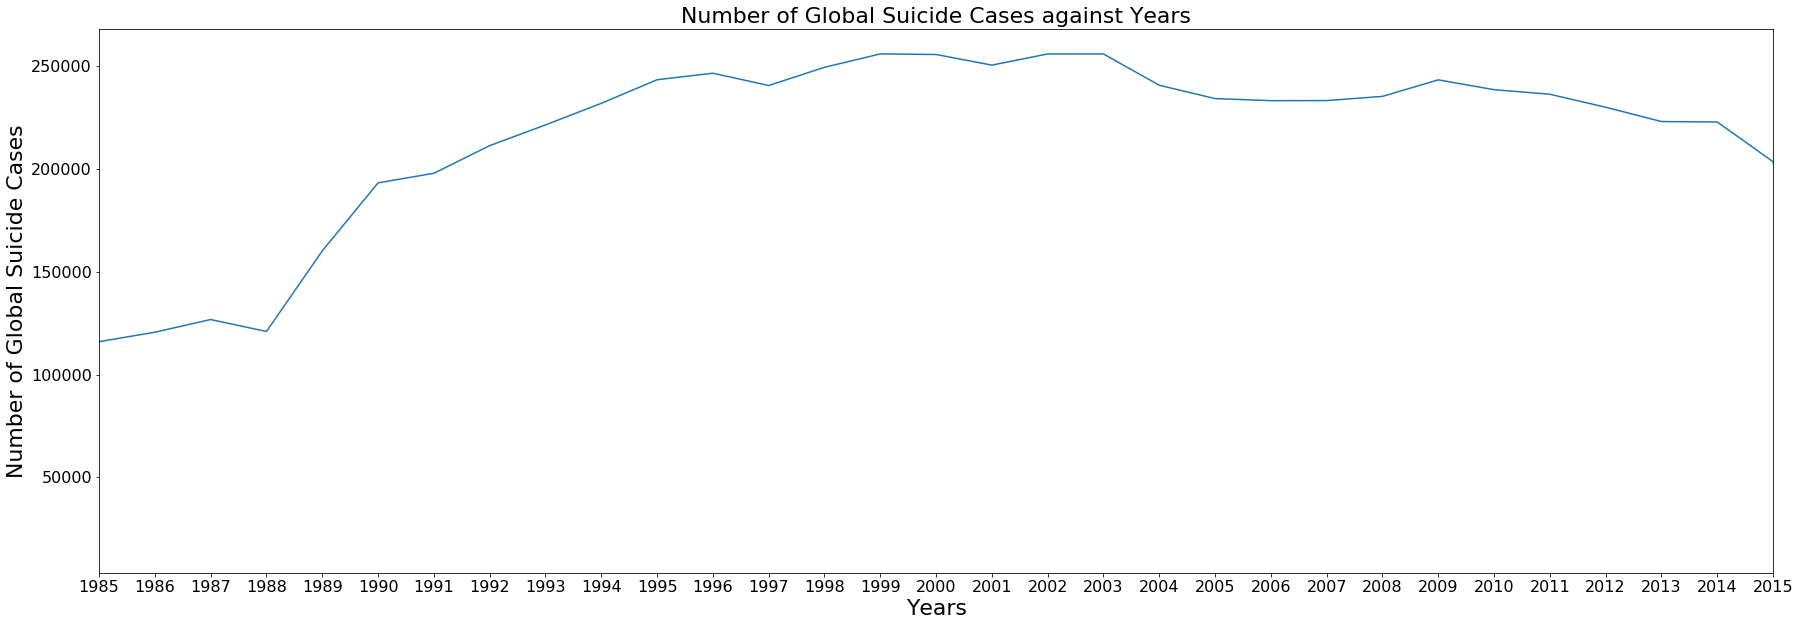

In [196]:
#Plot line graph with number of suicide cases against years
suicide_per_year = suicide.groupby('year')['suicides_no'].sum().sort_index()
x1 = suicide_per_year.index
y1 = suicide_per_year.values

linegraph1, ax1 = plt.subplots(figsize = (30, 10))

ax1.plot(x1, y1)

ax1.set_xticks(x1)
ax1.set_xticklabels(x1, fontsize = 16)

ax1.set_xlim([1985, 2015])
ax1.tick_params(axis = 'y', labelsize = 16)

ax1.set_title('Number of Global Suicide Cases against Years', fontsize = 22)
ax1.set_xlabel('Years', fontsize = 22)
ax1.set_ylabel('Number of Global Suicide Cases', fontsize = 22);

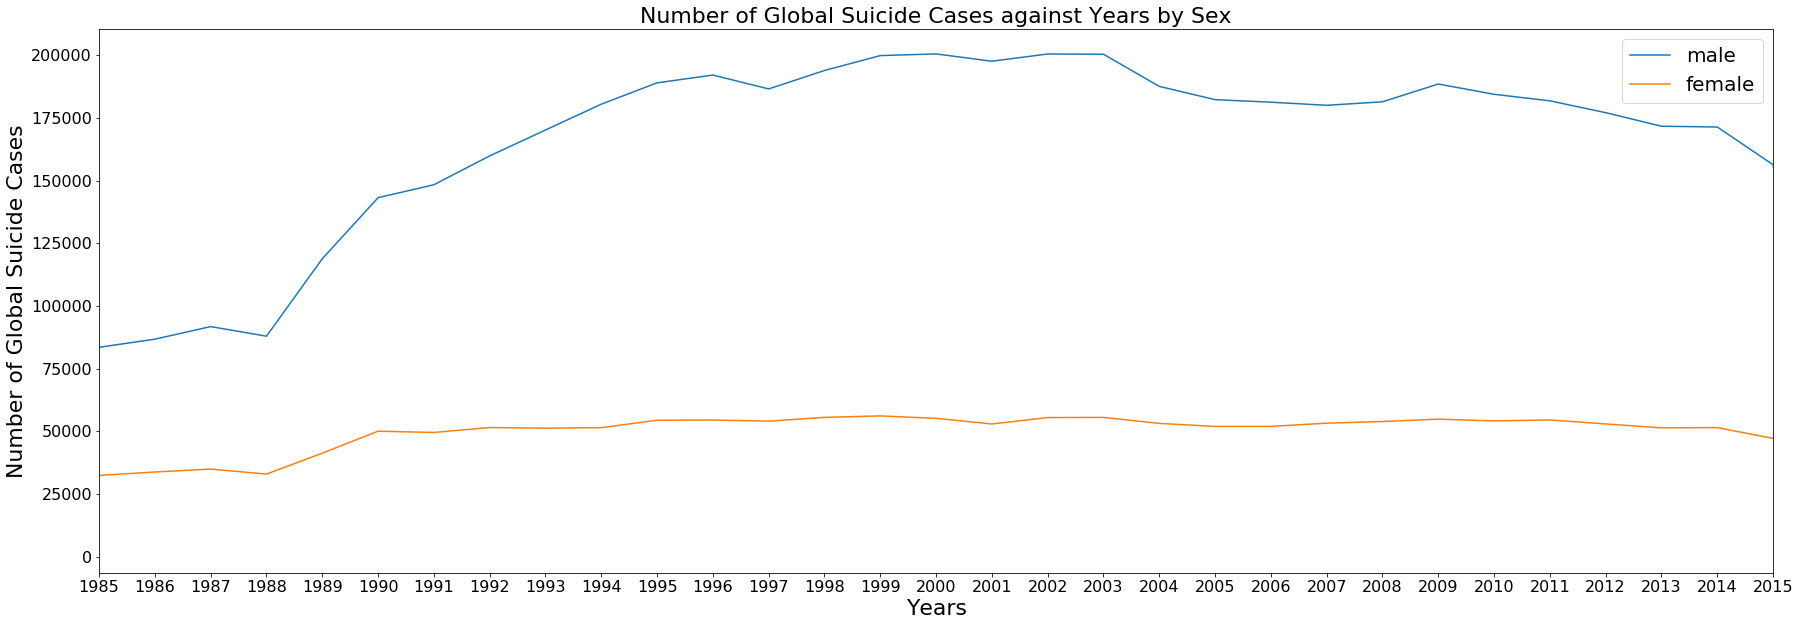

In [202]:
#
suicide_sex = suicide.groupby(['year', 'sex'])['suicides_no'].sum().sort_index()
suicide_sex = suicide_sex.unstack()

x2_1 = suicide_sex.index
y2_1 = suicide_sex['male']

x2_2 = suicide_sex.index
y2_2 = suicide_sex['female']

linegraph2, ax2 = plt.subplots(figsize = (30, 10))

ax2.plot(x2_1, y2_1, x2_2, y2_2)

ax2.set_xticks(x1)
ax2.set_xticklabels(x1, fontsize = 16)
ax2.set_xlim([1985, 2015])

ax2.tick_params(axis = 'y', labelsize = 16);

ax2.set_title('Number of Global Suicide Cases against Years by Sex', fontsize = 22)
ax2.set_xlabel('Years', fontsize = 22)
ax2.set_ylabel('Number of Global Suicide Cases', fontsize = 22)

ax2.legend(['male', 'female'], prop = {'size' : 20});

Text(0.5, 1.0, 'Top 10 Countries with Most Suicide Cases')

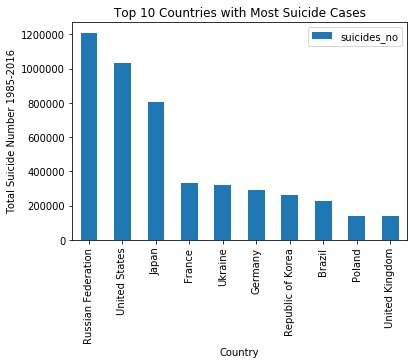

In [100]:
#Draw bar chart on the top 10 country with most suicide cases 1985-2016
top_suicide = pd.DataFrame(suicide.groupby('country')['suicides_no'].sum().sort_values(ascending = False).head(10))
barchart1 = top_suicide.plot.bar()
barchart1.set_xlabel('Country')
barchart1.set_ylabel('Total Suicide Number 1985-2016')
barchart1.set_title('Top 10 Countries with Most Suicide Cases')

sex   female    male
year                
1985   32479   83584
1986   33852   86818
1987   35006   91836
1988   33015   88011
1989   41361  118883
1990   50118  143243
1991   49622  148398
1992   51567  159906
1993   51331  170234
1994   51532  180531
1995   54504  189040
1996   54583  192142
1997   54126  186619
1998   55631  193960
1999   56215  199904
2000   55254  200578
2001   52999  197653
2002   55549  200546
2003   55627  200452
2004   53232  187629
2005   52035  182340
2006   52039  181322
2007   53324  180084
2008   53973  181474
2009   54920  188567
2010   54222  184480
2011   54616  181868
2012   53011  177149
2013   51459  171740
2014   51556  171428
2015   47248  156392
2016    3504   12099


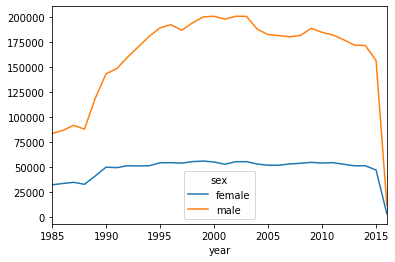

In [188]:
#Draft
pd.value_counts(suicide["age"])
a = suicide.groupby(['year', 'sex'])['suicides_no'].sum().sort_index()
a = a.unstack()
print(a)
a.plot();
# b = suicide.groupby('year')['suicides_no'].sum().sort_index()[suicide['sex'] == 'male']
# print(b)
# c = suicide.groupby('year')['suicides_no'].sum().sort_index()[suicide['sex'] == 'female']
# c